In [2]:
import sys
#sys.path.append('/Users/rociokiman/Documents/Gaia-Cupid/ActivityAgeRelation/banyan_sigma')
#from banyan_sigma import banyan_sigma
from astropy.io import fits
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from wdwarfdate import calc_wd_age

<Figure size 640x480 with 1 Axes>

/Users/rociokiman/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/rociokiman/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

## Check code

In [ ]:
binaries = fits.open('Catalogs/mdwarf-wdwarf_binaries.fits')
check_age = Table.read('Catalogs/stats.summary.local',format='ascii')
log = Table.read('Catalogs/trans_log.csv')

In [ ]:
binaries[1].columns

In [ ]:
gaia_id_binaries = binaries[1].data['Source_wd']
teff_binaries = binaries[1].data['TeffH_wd']
e_teff_binaries = binaries[1].data['e_TeffH_wd']
logg_binaries = binaries[1].data['loggH_wd']
e_logg_binaries = binaries[1].data['e_loggH_wd']
mass_binaries = binaries[1].data['MassH_wd']
e_mass_binaries = binaries[1].data['e_MassH_wd']
color_wd = binaries[1].data['phot_bp_mean_mag_wd'] - binaries[1].data['phot_rp_mean_mag_wd']

In [ ]:
gaia_id_log = np.array([x for x in log['Gaia_id']])
extra_id_log = np.array([x for x in log['extra_id']])

extra_id_check = np.array([float(x) for x in check_age['col1'][1:]])
total_age_check = np.array([float(x) for x in check_age['col4'][1:]])
e_total_age_check = np.array([float(x) for x in check_age['col5'][1:]])

In [ ]:
total_age = []
e_total_age = []
for x in extra_id_log:
    mask = x == extra_id_check
    if(any(mask)):
        total_age.append(total_age_check[mask][0])
        e_total_age.append(e_total_age_check[mask][0])
    else:
        total_age.append(np.nan)
        e_total_age.append(np.nan)
total_age = 10**np.array(total_age)
e_total_age = 10**np.array(e_total_age)

In [ ]:
total_age_median,total_age_std = calc_wd_age(teff_binaries,e_teff_binaries,logg_binaries,e_logg_binaries,
                                             mass_binaries,e_mass_binaries,n_mc=2000)

In [ ]:
plt.scatter(total_age,total_age_median,c=color_wd)
plt.plot(total_age[color_wd > 0.9],total_age_median[color_wd > 0.9],'.',color='r')
plt.plot(total_age,total_age,'k-')
plt.xlabel('von Hippel ages')
plt.ylabel('my ages')
plt.colorbar(label=r'$(G_{\rm BP}-G_{\rm RP})_{\rm WD}$')
plt.show()

plt.scatter(total_age,total_age-total_age_median,c=color_wd)
plt.plot(total_age[color_wd > 0.9],total_age[color_wd > 0.9]-total_age_median[color_wd > 0.9],'.',color='r')
plt.axhline(y=0,color='k')
plt.xlabel('von Hippel ages')
plt.ylabel(r'$\Delta (Age)$')
plt.colorbar(label=r'$(G_{\rm BP}-G_{\rm RP})_{\rm WD}$')
plt.show()


plt.scatter(total_age,total_age_median,c=mass_binaries)
plt.plot(total_age,total_age,'k-')
plt.xlabel('von Hippel ages')
plt.ylabel('my ages')
plt.colorbar(label=r'$Mass_{\rm WD}$')
plt.show()

In [3]:
cummings_2018 = Table.read('Catalogs/Cummings2018.csv',format='csv')

In [4]:
def IFMR_mist(initial_mass):
    if(not isinstance(initial_mass,np.ndarray)):
        initial_mass = np.array([initial_mass])
    N = len(initial_mass)
    final_mass = np.ones(N)*np.nan
    for i in range(N):
        if(initial_mass[i] > 0.83 and initial_mass[i] <= 2.85):
            final_mass[i] = 0.08*initial_mass[i] + 0.489
        elif(initial_mass[i] > 2.85 and initial_mass[i] <= 3.60):
            final_mass[i] = 0.187*initial_mass[i] + 0.184
        elif(initial_mass[i] > 3.60 and initial_mass[i] <= 7.20):
            final_mass[i] = 0.107*initial_mass[i] + 0.471
    return final_mass

def IFMR_mist_r(final_mass):
    if(not isinstance(final_mass,np.ndarray)):
        final_mass = np.array([final_mass])
        
    N = len(final_mass)
    initial_mass = np.ones(N)*np.nan
    for j in range(N):
        if((0.5554 < final_mass[j]) and (final_mass[j] <= 0.717)):
            initial_mass[j] = (final_mass[j] - 0.489)/0.08
        elif((0.71695 < final_mass[j]) and (final_mass[j] <= 0.8572)):
            initial_mass[j] = (final_mass[j] - 0.184)/0.187
        elif((0.8562 < final_mass[j]) and (final_mass[j] <= 1.2414)):
            initial_mass[j] = (final_mass[j] - 0.471)/0.107
    return initial_mass

In [5]:
mask_outliers = abs(IFMR_mist(cummings_2018['Mi_mist'])-cummings_2018['Mf']) > 2*cummings_2018['Mf_err']
mask_outliers[40] = True #Evident outlier in the paper but is outside the range of initial masses so the
                          #cut doesn't remove it

/Users/rociokiman/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


In [6]:
teff = cummings_2018['Teff']
teff_err = cummings_2018['Teff_err']
logg = cummings_2018['logg']
logg_err = cummings_2018['logg_err']
final_mass = cummings_2018['Mf']
final_mass_err = cummings_2018['Mf_err']
tcool = cummings_2018['Tcool']
tcool_err_high = cummings_2018['Tcool_err_high']
tcool_err_low = cummings_2018['Tcool_err_low']
initial_mass = cummings_2018['Mi_mist']
initial_mass_err_low = cummings_2018['Mi_mist_err_low']
initial_mass_err_high = cummings_2018['Mi_mist_err_high']
total_age = cummings_2018['Age_mist']
total_age_err = cummings_2018['Age_mist_err']

In [7]:
results = calc_wd_age(teff,teff_err,logg,logg_err,n_mc=10000,vvcrit='0.0',return_distributions=True)

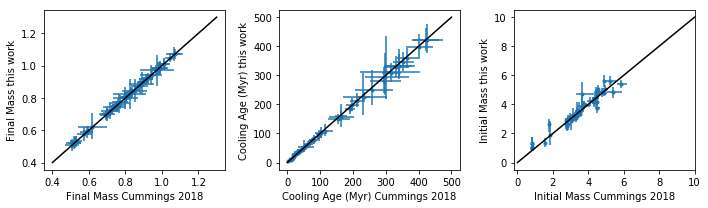

In [8]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,3))
x = np.linspace(0.4,1.3)
ax1.errorbar(final_mass[~mask_outliers],results['final_mass_median'][~mask_outliers],
             xerr=final_mass_err[~mask_outliers],
             yerr=(results['final_mass_median'][~mask_outliers] - results['final_mass_err_low'][~mask_outliers],
                   results['final_mass_err_high'][~mask_outliers] - results['final_mass_median'][~mask_outliers]),fmt='.',zorder=0)
ax1.plot(x,x,color='k',zorder=2)
ax1.set_xlabel('Final Mass Cummings 2018')
ax1.set_ylabel('Final Mass this work')

x = np.linspace(0,500)
ax2.errorbar(tcool[~mask_outliers],results['cooling_age_median'][~mask_outliers]/1e6,
             xerr=(tcool_err_low[~mask_outliers],tcool_err_high[~mask_outliers]),
             yerr=(results['cooling_age_median'][~mask_outliers]/1e6 - results['cooling_age_err_low'][~mask_outliers]/1e6,
                   results['cooling_age_err_high'][~mask_outliers]/1e6 - results['cooling_age_median'][~mask_outliers]/1e6),fmt='.',zorder=0)
ax2.plot(x,x,color='k',zorder=2)
ax2.set_xlabel('Cooling Age (Myr) Cummings 2018')
ax2.set_ylabel('Cooling Age (Myr) this work')

x = np.linspace(0,10)
ax3.errorbar(initial_mass[~mask_outliers],results['initial_mass_median'][~mask_outliers],
             xerr=(initial_mass_err_low[~mask_outliers],initial_mass_err_high[~mask_outliers]),
             yerr=(results['initial_mass_median'][~mask_outliers] - results['initial_mass_err_low'][~mask_outliers],
                   results['initial_mass_err_high'][~mask_outliers] - results['initial_mass_median'][~mask_outliers]),fmt='.',zorder=0)
ax3.plot(x,x,color='k',zorder=2)
ax3.set_xlabel('Initial Mass Cummings 2018')
ax3.set_ylabel('Initial Mass this work')
ax3.set_xlim(-0.2,10)

plt.tight_layout()

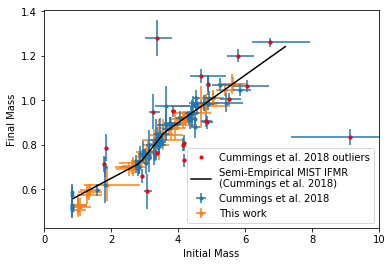

In [9]:
x = np.linspace(0.87,7.20)
plt.errorbar(cummings_2018['Mi_mist'],cummings_2018['Mf'],
             xerr=(cummings_2018['Mi_mist_err_low'],cummings_2018['Mi_mist_err_high']),
             yerr=cummings_2018['Mf_err'],fmt='.',label='Cummings et al. 2018',zorder=2)
plt.plot(cummings_2018['Mi_mist'][mask_outliers],cummings_2018['Mf'][mask_outliers],
         '.r',label='Cummings et al. 2018 outliers',zorder=3)
plt.errorbar(results['initial_mass_median'][~mask_outliers],results['final_mass_median'][~mask_outliers],
             xerr=(results['initial_mass_median'][~mask_outliers] - results['initial_mass_err_low'][~mask_outliers],
                   results['initial_mass_err_high'][~mask_outliers] - results['initial_mass_median'][~mask_outliers]),
             yerr=(results['final_mass_median'][~mask_outliers] - results['final_mass_err_low'][~mask_outliers],
                   results['final_mass_err_high'][~mask_outliers] - results['final_mass_median'][~mask_outliers]),
             fmt='.',zorder=0,
             label='This work')
plt.plot(x,IFMR_mist(x),color='k',zorder=4,label='Semi-Empirical MIST IFMR\n(Cummings et al. 2018)')
plt.xlabel('Initial Mass')
plt.ylabel('Final Mass')
plt.xlim(0,10)
plt.legend(loc=4)

In [10]:
from brokenaxes import brokenaxes

Text(0, 0.5, 'Total Age this work (Myr)')

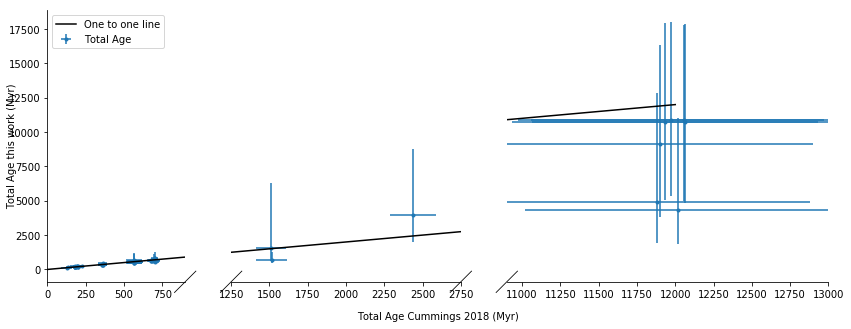

In [12]:
random_shift = np.random.rand(len(total_age))*total_age*0.02 - (total_age*0.02/2)
fig = plt.figure(figsize=(14,5))
bax = brokenaxes(xlims=((-1, 900), (1250,2750), (10900, 13000)), hspace=.05)
x = np.linspace(0,12000)
bax.errorbar((total_age+random_shift)[~mask_outliers],results['total_age_median'][~mask_outliers]/1e6,
             xerr=total_age_err[~mask_outliers],
             yerr=(results['total_age_median'][~mask_outliers]/1e6 - results['total_age_err_low'][~mask_outliers]/1e6,
                   results['total_age_err_high'][~mask_outliers]/1e6 - results['total_age_median'][~mask_outliers]/1e6),
             label='Total Age',fmt='.',zorder=0)
bax.plot(x,x,color='k',zorder=3,label='One to one line')
bax.legend(loc=2)
bax.set_xlabel('Total Age Cummings 2018 (Myr)')
bax.set_ylabel('Total Age this work (Myr)')

In [2]:
teff=np.array([20000,10000])
e_teff=np.array([500,100])
logg=np.array([8.0,8.0])
e_logg=np.array([0.2,0.1])
final_mass=np.array([0.6,0.6])
e_final_mass=np.array([0.06,0.01])

total_age_median,total_age_std = calc_wd_age(teff,e_teff,logg,e_logg,final_mass,e_final_mass,n_mc=2000,model_wd='DA',feh='p0.00',vvcrit='0.0')

In [3]:
print(total_age_median,total_age_std)

[2.92777207e+09 4.71686344e+09] [3.83953193e+09 1.12597636e+09]


In [2]:
wd_gold = fits.open('/Users/rociokiman/Documents/M-dwarfs-Age-Activity-Relation/Catalogs/gold_gaiawd.fits')
mg_ref = Table.read('/Users/rociokiman/Documents/M-dwarfs-Age-Activity-Relation/Catalogs/moving_groups_ref.csv')

In [3]:
ra = wd_gold[1].data['ra']
dec = wd_gold[1].data['dec']
pmra = wd_gold[1].data['pmra']
pmra_error = wd_gold[1].data['pmra_error']
pmdec = wd_gold[1].data['pmdec']
pmdec_error = wd_gold[1].data['pmdec_error']
parallax = wd_gold[1].data['parallax']
parallax_error = wd_gold[1].data['parallax_error']

In [4]:
mask = ((~np.isnan(ra+dec+pmra+pmra_error+pmdec+pmdec_error+parallax+parallax_error))
        * (parallax/parallax_error > 10))

In [5]:
OUTPUT_STRUCTURE = banyan_sigma(ra=ra[mask], dec=dec[mask], 
                                 pmra=pmra[mask], pmdec=pmdec[mask], 
                                 epmra=pmra_error[mask], 
                                 epmdec=pmdec_error[mask], 
                                 plx=parallax[mask], 
                                 eplx=parallax_error[mask])

In [6]:
mg_ref.columns

<TableColumns names=('name','age','age_error','ref_age','group_num','Comment','col6')>

In [7]:
prob_ya_small = np.array(OUTPUT_STRUCTURE['YA_PROB']).reshape(len(OUTPUT_STRUCTURE['YA_PROB']),)
best_ya_small = np.array(OUTPUT_STRUCTURE['BEST_YA']).reshape(len(OUTPUT_STRUCTURE['BEST_YA']),)
mask_group = prob_ya_small > 0.9
age_small = []
for x in best_ya_small[mask_group]:
    mask_mg = x == mg_ref['name']
    age_small.append(mg_ref['age'][mask_mg][0])
    
age_ya = np.array(age_small)*1e6
prob_ya = prob_ya_small[mask_group]

In [8]:
logg = wd_gold[1].data['log_g'][mask][mask_group]
e_logg = wd_gold[1].data['elog_g'][mask][mask_group]
teff = wd_gold[1].data['Teff'][mask][mask_group]
e_teff = wd_gold[1].data['eTeff'][mask][mask_group]
final_mass = wd_gold[1].data['mass'][mask][mask_group]
e_final_mass = wd_gold[1].data['emass'][mask][mask_group]

In [9]:
age_ya[~np.isnan(age_ya)]

array([1.50e+06, 1.50e+06, 4.00e+07, 4.00e+07, 5.62e+08, 5.62e+08,
       1.50e+06])

In [10]:
total_age_median,total_age_std = calc_wd_age(teff,e_teff,logg,e_logg,final_mass,e_final_mass,n_mc=2000,model_wd='DA',
                                             feh='p0.00',vvcrit='0.0')

/Users/rociokiman/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/Users/rociokiman/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [18]:
total_age_median

array([1.81417686e+09,            nan, 3.67454631e+09, 3.67225881e+09,
       5.72644459e+08, 5.72714932e+08, 1.07000091e+16])

In [19]:
final_mass

array([0.755232, 0.339804, 0.788042, 0.788042, 0.886805, 0.886805,
       1.004971])

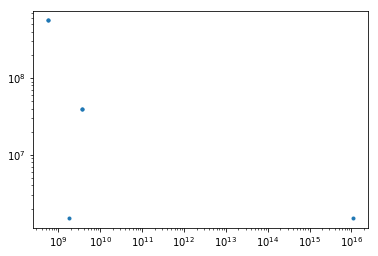

In [17]:
plt.loglog(total_age_median,age_ya,'.')